In [1]:
!pip install statsbombpy

In [2]:
!pip install mplsoccer

     |████████████████████████████████| 57 kB 2.1 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=e276fb607b1885fa54d0331fd37c44e696fdcf8fab4738861a6c1ea2384d0a6f
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [3]:
from statsbombpy import sb

In [4]:
sb.matches(competition_id=16,season_id=27)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18243,2016-05-28,20:45:00.000,Europe - Champions League,2015/2016,Real Madrid,Atlético Madrid,1,1,available,...,2021-06-13T16:17:31.694,1,Final,Stadio Giuseppe Meazza,Mark Clattenburg,Zinédine Zidane,Diego Pablo Simeone,1.0.3,None,None


In [5]:
events = sb.events(match_id = 18243)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [6]:
events = events[['team','type','minute','location','pass_end_location','player','pass_recipient']]

In [7]:
events_1=events[events['team']=='Atlético Madrid']
events_1

,team,type,minute,location,pass_end_location,player,pass_recipient
1,Atlético Madrid,Starting XI,0,NaN,NaN,NaN,NaN
3,Atlético Madrid,Half Start,0,NaN,NaN,NaN,NaN
5,Atlético Madrid,Half Start,45,NaN,NaN,NaN,NaN
7,Atlético Madrid,Half Start,90,NaN,NaN,NaN,NaN
9,Atlético Madrid,Half Start,105,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4697,Atlético Madrid,Substitution,115,NaN,NaN,Jorge Resurrección Merodio,NaN
4699,Atlético Madrid,Bad Behaviour,92,NaN,NaN,Gabriel Fernández Arenas,NaN
4700,Atlético Madrid,Injury Stoppage,49,NaN,NaN,Gabriel Fernández Arenas,NaN
4705,Atlético Madrid,50/50,95,"[28.0, 74.0]",NaN,Juan Francisco Torres Belén,NaN


In [8]:
events_1[events_1['type']=='Substitution']

,team,type,minute,location,pass_end_location,player,pass_recipient
4692,Atlético Madrid,Substitution,45,NaN,NaN,Augusto Matías Fernández,NaN
4696,Atlético Madrid,Substitution,108,NaN,NaN,Filipe Luís Kasmirski,NaN
4697,Atlético Madrid,Substitution,115,NaN,NaN,Jorge Resurrección Merodio,NaN


In [9]:
pass_events=events_1[events_1['type']=='Pass'].reset_index()
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,12,Atlético Madrid,Pass,0,"[61.0, 41.0]","[61.0, 43.0]",Antoine Griezmann,Jorge Resurrección Merodio
1,13,Atlético Madrid,Pass,0,"[61.0, 44.0]","[45.0, 43.0]",Jorge Resurrección Merodio,Gabriel Fernández Arenas
2,14,Atlético Madrid,Pass,0,"[46.0, 44.0]","[39.0, 71.0]",Gabriel Fernández Arenas,Stefan Savić
3,15,Atlético Madrid,Pass,0,"[42.0, 72.0]","[46.0, 72.0]",Stefan Savić,NaN
4,16,Atlético Madrid,Pass,0,"[36.0, 80.0]","[56.0, 78.0]",Juan Francisco Torres Belén,Saúl Ñíguez Esclapez
...,...,...,...,...,...,...,...,...
713,1351,Atlético Madrid,Pass,119,"[16.0, 18.0]","[35.0, 6.0]",Diego Roberto Godín Leal,Yannick Ferreira Carrasco
714,1352,Atlético Madrid,Pass,119,"[35.0, 6.0]","[29.0, 3.0]",Yannick Ferreira Carrasco,Lucas Hernández Pi
715,1353,Atlético Madrid,Pass,119,"[43.0, 2.0]","[51.0, 12.0]",Lucas Hernández Pi,Saúl Ñíguez Esclapez
716,1360,Atlético Madrid,Pass,119,"[22.0, 44.0]","[25.0, 40.0]",Antoine Griezmann,Thomas Teye Partey


In [10]:
pass_events=pass_events[pass_events['minute']<45]
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,12,Atlético Madrid,Pass,0,"[61.0, 41.0]","[61.0, 43.0]",Antoine Griezmann,Jorge Resurrección Merodio
1,13,Atlético Madrid,Pass,0,"[61.0, 44.0]","[45.0, 43.0]",Jorge Resurrección Merodio,Gabriel Fernández Arenas
2,14,Atlético Madrid,Pass,0,"[46.0, 44.0]","[39.0, 71.0]",Gabriel Fernández Arenas,Stefan Savić
3,15,Atlético Madrid,Pass,0,"[42.0, 72.0]","[46.0, 72.0]",Stefan Savić,NaN
4,16,Atlético Madrid,Pass,0,"[36.0, 80.0]","[56.0, 78.0]",Juan Francisco Torres Belén,Saúl Ñíguez Esclapez
...,...,...,...,...,...,...,...,...
291,592,Atlético Madrid,Pass,44,"[43.0, 45.0]","[17.0, 47.0]",Diego Roberto Godín Leal,Jan Oblak
292,593,Atlético Madrid,Pass,44,"[18.0, 47.0]","[35.0, 59.0]",Jan Oblak,Stefan Savić
293,594,Atlético Madrid,Pass,44,"[37.0, 63.0]","[45.0, 58.0]",Stefan Savić,Gabriel Fernández Arenas
294,595,Atlético Madrid,Pass,44,"[53.0, 52.0]","[79.0, 3.0]",Gabriel Fernández Arenas,Filipe Luís Kasmirski


In [11]:
passes_between=pass_events.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
passes_between

,player,pass_recipient,type
0,Antoine Griezmann,Augusto Matías Fernández,2
1,Antoine Griezmann,Fernando José Torres Sanz,1
2,Antoine Griezmann,Filipe Luís Kasmirski,5
3,Antoine Griezmann,Gabriel Fernández Arenas,2
4,Antoine Griezmann,Jorge Resurrección Merodio,8
...,...,...,...
66,Stefan Savić,Filipe Luís Kasmirski,1
67,Stefan Savić,Gabriel Fernández Arenas,5
68,Stefan Savić,Jorge Resurrección Merodio,3
69,Stefan Savić,Juan Francisco Torres Belén,5


In [12]:
#for all events for france
game=events_1[(events_1['player'].isin(passes_between['player'])) & (events_1['pass_recipient'].isin(passes_between['pass_recipient']))]
game['pass_recipient'].nunique()

11

In [13]:
game=game.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
game

,player,pass_recipient,type
0,Antoine Griezmann,Augusto Matías Fernández,2
1,Antoine Griezmann,Diego Roberto Godín Leal,1
2,Antoine Griezmann,Fernando José Torres Sanz,5
3,Antoine Griezmann,Filipe Luís Kasmirski,10
4,Antoine Griezmann,Gabriel Fernández Arenas,12
...,...,...,...
80,Stefan Savić,Gabriel Fernández Arenas,9
81,Stefan Savić,Jan Oblak,1
82,Stefan Savić,Jorge Resurrección Merodio,8
83,Stefan Savić,Juan Francisco Torres Belén,10


In [14]:
game.rename(columns={'type':'pass_count'},inplace=True)

In [15]:
desc=game.describe()
threshold=desc.iloc[4]
thresh=threshold.item()
game=game[game['pass_count']>thresh].reset_index(drop=True)
game.describe()

,pass_count
count,57.000000
mean,8.368421
std,5.671456
min,3.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,27.000000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,10))
scaler.fit(game['pass_count'].values.reshape(-1,1))
game['pass_count']=scaler.transform(game['pass_count'].values.reshape(-1,1))
game

,player,pass_recipient,pass_count
0,Antoine Griezmann,Fernando José Torres Sanz,0.833333
1,Antoine Griezmann,Filipe Luís Kasmirski,2.916667
2,Antoine Griezmann,Gabriel Fernández Arenas,3.750000
3,Antoine Griezmann,Jorge Resurrección Merodio,3.750000
4,Antoine Griezmann,Juan Francisco Torres Belén,0.416667
5,Antoine Griezmann,Saúl Ñíguez Esclapez,1.250000
6,Augusto Matías Fernández,Antoine Griezmann,0.416667
7,Augusto Matías Fernández,Diego Roberto Godín Leal,0.416667
8,Augusto Matías Fernández,Filipe Luís Kasmirski,1.666667
9,Augusto Matías Fernández,Gabriel Fernández Arenas,0.000000


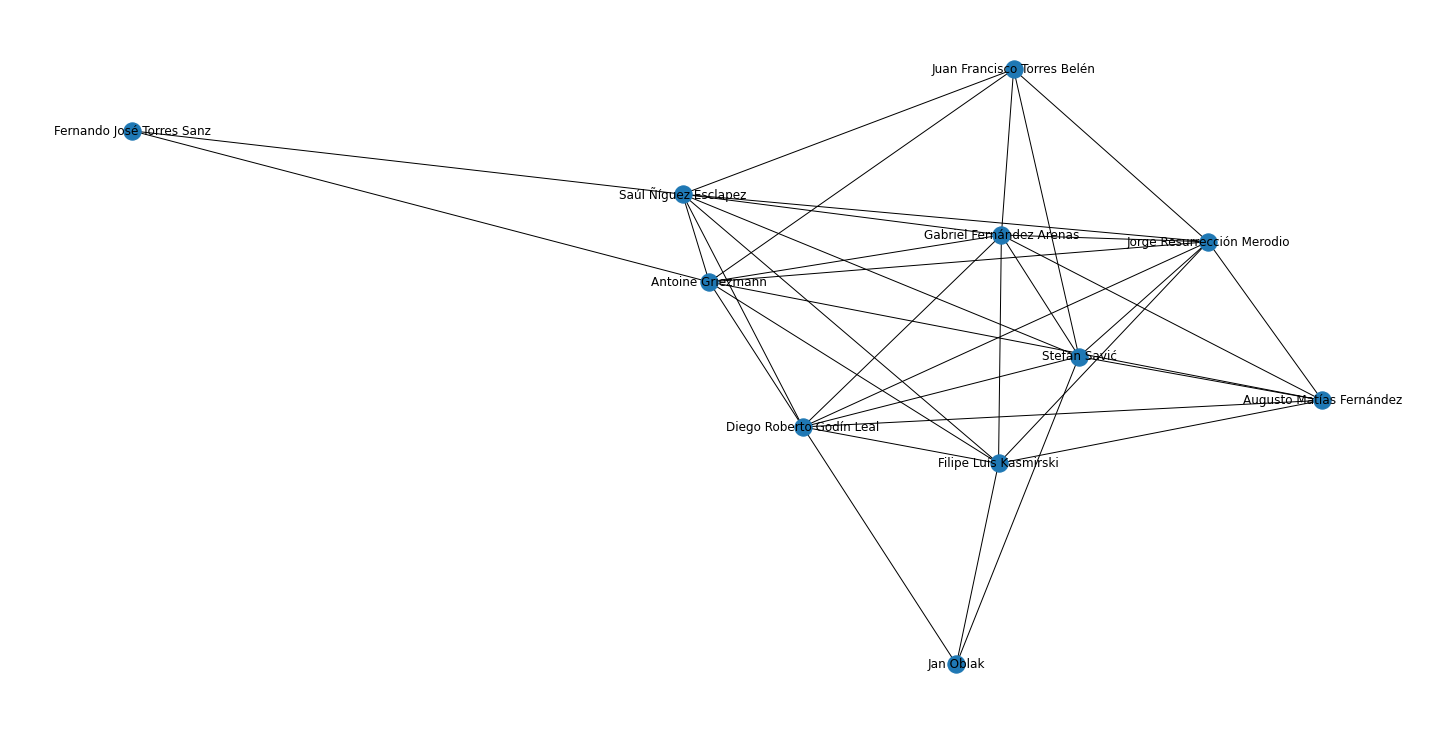

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
# Build your graph
G=nx.from_pandas_edgelist(game, 'player', 'pass_recipient',edge_attr='pass_count')
 
# Plot it
plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True)
plt.show()

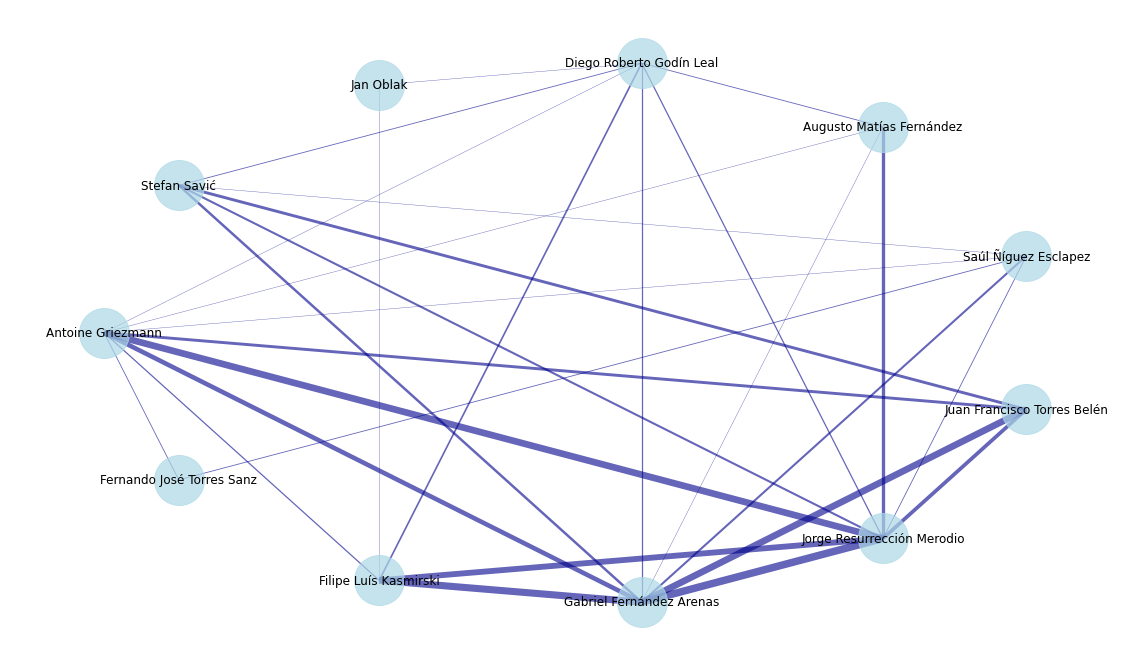

In [18]:
widths = nx.get_edge_attributes(G, 'pass_count')
nodelist = G.nodes()

plt.figure(figsize=(20,12))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=2500,
                       node_color='lightblue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='darkblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

In [19]:
game.player.nunique()

10

In [20]:
#events_1=events_1[events_1['type']=='Pass']

In [21]:
import pandas as pd
df3 = pd.DataFrame(events_1)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
1,Atlético Madrid,Starting XI,0,NaN,NaN,NaN,NaN
3,Atlético Madrid,Half Start,0,NaN,NaN,NaN,NaN
5,Atlético Madrid,Half Start,45,NaN,NaN,NaN,NaN
7,Atlético Madrid,Half Start,90,NaN,NaN,NaN,NaN
9,Atlético Madrid,Half Start,105,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4697,Atlético Madrid,Substitution,115,NaN,NaN,Jorge Resurrección Merodio,NaN
4699,Atlético Madrid,Bad Behaviour,92,NaN,NaN,Gabriel Fernández Arenas,NaN
4700,Atlético Madrid,Injury Stoppage,49,NaN,NaN,Gabriel Fernández Arenas,NaN
4705,Atlético Madrid,50/50,95,"[28.0, 74.0]",NaN,Juan Francisco Torres Belén,NaN


In [22]:
df3=df3[df3['player'].notna()]
df3=df3[df3['location'].notna()]
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
12,Atlético Madrid,Pass,0,"[61.0, 41.0]","[61.0, 43.0]",Antoine Griezmann,Jorge Resurrección Merodio
13,Atlético Madrid,Pass,0,"[61.0, 44.0]","[45.0, 43.0]",Jorge Resurrección Merodio,Gabriel Fernández Arenas
14,Atlético Madrid,Pass,0,"[46.0, 44.0]","[39.0, 71.0]",Gabriel Fernández Arenas,Stefan Savić
15,Atlético Madrid,Pass,0,"[42.0, 72.0]","[46.0, 72.0]",Stefan Savić,NaN
16,Atlético Madrid,Pass,0,"[36.0, 80.0]","[56.0, 78.0]",Juan Francisco Torres Belén,Saúl Ñíguez Esclapez
...,...,...,...,...,...,...,...
4676,Atlético Madrid,Miscontrol,111,"[57.0, 20.0]",NaN,Saúl Ñíguez Esclapez,NaN
4679,Atlético Madrid,Miscontrol,118,"[42.0, 4.0]",NaN,Yannick Ferreira Carrasco,NaN
4681,Atlético Madrid,Miscontrol,119,"[105.0, 18.0]",NaN,Yannick Ferreira Carrasco,NaN
4705,Atlético Madrid,50/50,95,"[28.0, 74.0]",NaN,Juan Francisco Torres Belén,NaN


In [23]:
df3[['locationx','locationy']] = pd.DataFrame(df3.location.tolist(), index= df3.index)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient,locationx,locationy
12,Atlético Madrid,Pass,0,"[61.0, 41.0]","[61.0, 43.0]",Antoine Griezmann,Jorge Resurrección Merodio,61.0,41.0
13,Atlético Madrid,Pass,0,"[61.0, 44.0]","[45.0, 43.0]",Jorge Resurrección Merodio,Gabriel Fernández Arenas,61.0,44.0
14,Atlético Madrid,Pass,0,"[46.0, 44.0]","[39.0, 71.0]",Gabriel Fernández Arenas,Stefan Savić,46.0,44.0
15,Atlético Madrid,Pass,0,"[42.0, 72.0]","[46.0, 72.0]",Stefan Savić,NaN,42.0,72.0
16,Atlético Madrid,Pass,0,"[36.0, 80.0]","[56.0, 78.0]",Juan Francisco Torres Belén,Saúl Ñíguez Esclapez,36.0,80.0
...,...,...,...,...,...,...,...,...,...
4676,Atlético Madrid,Miscontrol,111,"[57.0, 20.0]",NaN,Saúl Ñíguez Esclapez,NaN,57.0,20.0
4679,Atlético Madrid,Miscontrol,118,"[42.0, 4.0]",NaN,Yannick Ferreira Carrasco,NaN,42.0,4.0
4681,Atlético Madrid,Miscontrol,119,"[105.0, 18.0]",NaN,Yannick Ferreira Carrasco,NaN,105.0,18.0
4705,Atlético Madrid,50/50,95,"[28.0, 74.0]",NaN,Juan Francisco Torres Belén,NaN,28.0,74.0


In [24]:
df3=df3.groupby(by=['player'],as_index=False).agg({'locationx':'mean','locationy':'mean'})
df3

,player,locationx,locationy
0,Antoine Griezmann,71.336066,46.459016
1,Augusto Matías Fernández,54.475410,31.655738
2,Diego Roberto Godín Leal,43.058140,26.720930
3,Fernando José Torres Sanz,74.891892,40.540541
4,Filipe Luís Kasmirski,67.844765,10.924188
5,Gabriel Fernández Arenas,55.687500,43.460227
6,Jan Oblak,7.240000,40.466667
7,Jorge Resurrección Merodio,67.131054,34.940171
8,Juan Francisco Torres Belén,64.112299,72.909091
9,Lucas Hernández Pi,37.000000,10.727273


In [25]:
df3=df3[df3['player'].isin(game['player'].unique())].reset_index(drop=True)

In [26]:
df3.loc[(df3['locationy']<50.0),'location_y']=(100-df3['locationy'])
df3.loc[(df3['locationy']>50.0),'location_y']=(100-df3['locationy'])
df3

,player,locationx,locationy,location_y
0,Antoine Griezmann,71.336066,46.459016,53.540984
1,Augusto Matías Fernández,54.475410,31.655738,68.344262
2,Diego Roberto Godín Leal,43.058140,26.720930,73.279070
3,Filipe Luís Kasmirski,67.844765,10.924188,89.075812
4,Gabriel Fernández Arenas,55.687500,43.460227,56.539773
5,Jan Oblak,7.240000,40.466667,59.533333
6,Jorge Resurrección Merodio,67.131054,34.940171,65.059829
7,Juan Francisco Torres Belén,64.112299,72.909091,27.090909
8,Saúl Ñíguez Esclapez,73.657143,48.868571,51.131429
9,Stefan Savić,35.482759,56.400000,43.600000


In [27]:
df3.set_index('player',inplace=True)

In [28]:

!pip install highlight_text

In [29]:
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


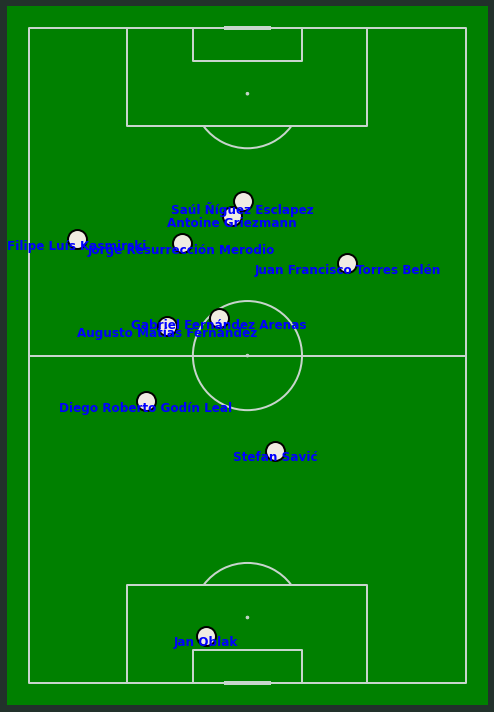

In [30]:
#plotting the average location for the players
#Make arrows less transparent if they have a higher count, totally optional of course
from mplsoccer import Pitch, VerticalPitch
import numpy as np
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(df3), 1))


#plot pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='green', line_color='#c7d5cc', figsize=(20, 1),
              constrained_layout=True, tight_layout=False,half=False)
fig, ax = pitch.draw(figsize=(20,10))



''' 
pass_arrows = pitch.arrows(1.2*passes_between.x, 80-0.8*passes_between.y,
                         1.2*passes_between.x_end, 80-0.8*passes_between.y_end, width=5,
                         headwidth=5, headlength=5, color=color, ax=ax, zorder=1)

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

ax.add_patch(arrow)
 '''
#plot nodes
pass_nodes = pitch.scatter(1.2*df3.locationx, 80-0.8*df3.location_y,s=360,
                           color='#f0ece2', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
# pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 5 Times", (-4, 40), color='w',
#                fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono")


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in df3.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.locationx, 80-0.8*row.location_y), c='blue', va='top', ha='center', size=12, fontweight='bold', fontfamily="Calibri",ax=ax)

#Set the background color
fig.patch.set_facecolor('#22312b')


In [31]:
nx.write_gml(G, "AtleticovsRealmadrid(ATL).gml")